In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('UCI_Heart_Disease_Data.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [3]:
# عرض القيم الفريدة لكل عمود من النوع Object
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in sex: ['Male' 'Female']
Unique values in dataset: ['Cleveland' 'Hungary' 'Switzerland' 'VA Long Beach']
Unique values in cp: ['typical angina' 'asymptomatic' 'non-anginal' 'atypical angina']
Unique values in fbs: [True False nan]
Unique values in restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
Unique values in exang: [False True nan]
Unique values in slope: ['downsloping' 'flat' 'upsloping' nan]
Unique values in thal: ['fixed defect' 'normal' 'reversable defect' nan]


In [4]:
# الإحصائيات العامة
print(df.describe())

# التحقق من القيم الناقصة
print(df.isnull().sum())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [5]:
# استبدال القيم المفقودة في الأعمدة العددية بالمتوسط
num_cols = ['trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

In [6]:
# استبدال القيم المفقودة في الأعمدة الفئوية بالقيمة الأكثر تكرارًا
cat_cols = ['fbs', 'restecg', 'exang', 'slope', 'thal']
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [7]:
from sklearn.preprocessing import LabelEncoder

# تحويل البيانات الفئوية إلى أرقام باستخدام Label Encoding
encoder = LabelEncoder()
for col in ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']:
    df[col] = encoder.fit_transform(df[col])

In [8]:
# التحقق من عدم وجود قيم مفقودة بعد المعالجة
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [9]:
# عرض أول 5 صفوف بعد التنظيف
print(df.head())

   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    2  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0  


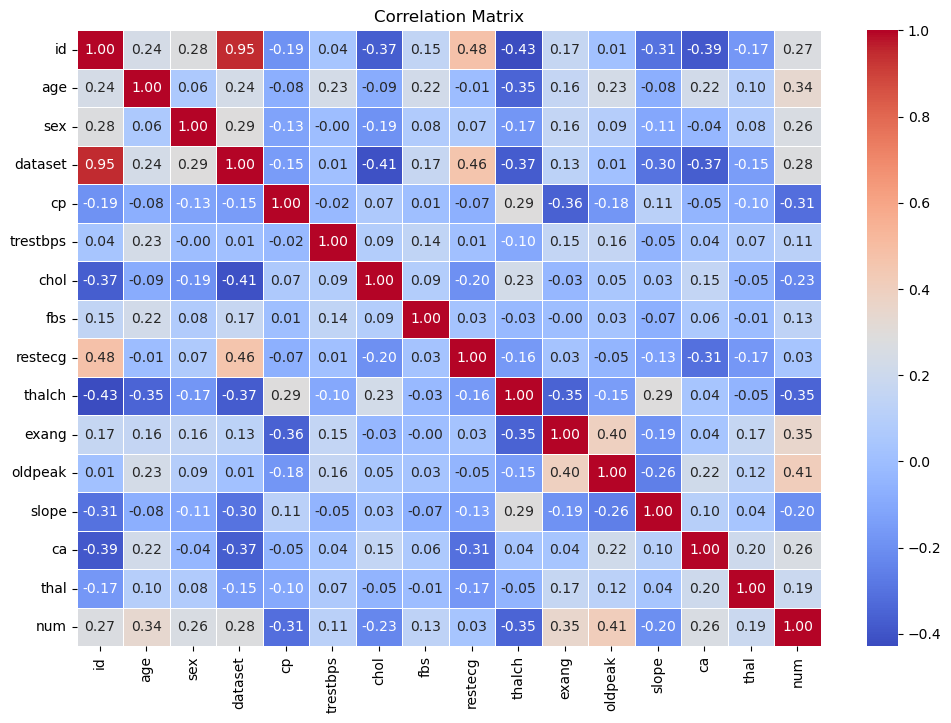

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# حساب مصفوفة الارتباط
correlation_matrix = df.corr()

# رسم خريطة الحرارة
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16928\2223719366.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['num'], palette="viridis")


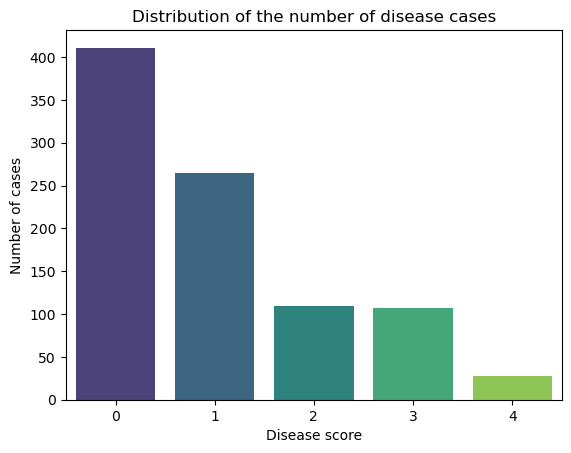

In [11]:
# رسم توزيع الفئات المستهدفة (عدد حالات المرض)
sns.countplot(x=df['num'], palette="viridis")
plt.title("Distribution of the number of disease cases")
plt.xlabel("Disease score")
plt.ylabel("Number of cases")
plt.show()

In [12]:
!pip install imbalanced-learn

In [13]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# استخراج الميزات والهدف
X = df.drop('num', axis=1)  # مميزات البيانات
y = df['num']  # المتغير الهدف (عدد الحالات)

# تطبيق SMOTE لموازنة البيانات
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# تحقق من توزيع الفئات بعد تطبيق SMOTE
print(f"Class distribution after SMOTE: {Counter(y_smote)}")

Class distribution after SMOTE: Counter({0: 411, 2: 411, 1: 411, 3: 411, 4: 411})


C:\Users\user\AppData\Local\Temp\ipykernel_16928\2590407777.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_smote, palette="viridis")


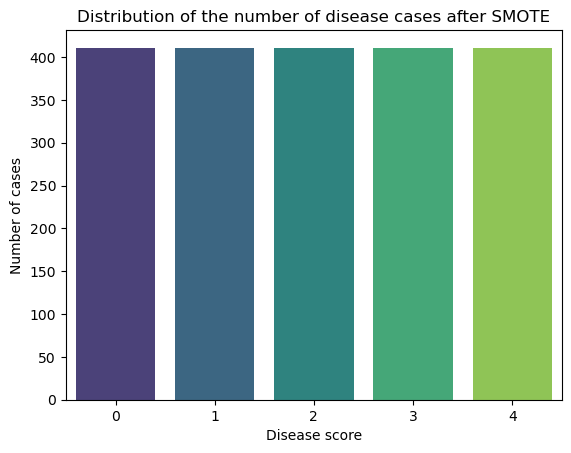

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# رسم توزيع الفئات بعد تطبيق SMOTE
sns.countplot(x=y_smote, palette="viridis")
plt.title("Distribution of the number of disease cases after SMOTE")
plt.xlabel("Disease score")
plt.ylabel("Number of cases")
plt.show()

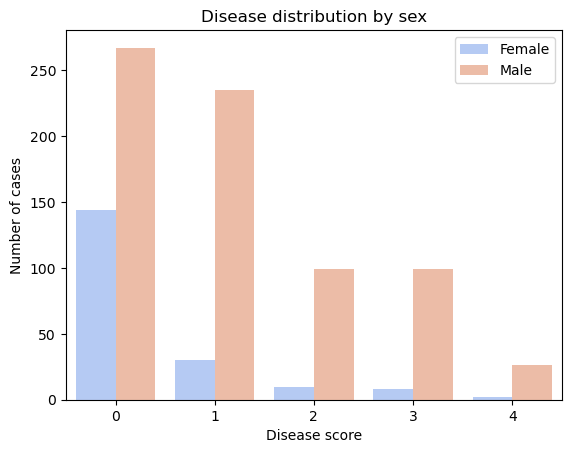

In [15]:
# تحليل العلاقة بين الجنس والمرض
sns.countplot(x=df['num'], hue=df['sex'], palette="coolwarm")
plt.title("Disease distribution by sex")
plt.xlabel("Disease score")
plt.ylabel("Number of cases")
plt.legend(["Female", "Male"])
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16928\2121175975.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["num"], y=df["age"], palette="Set3")


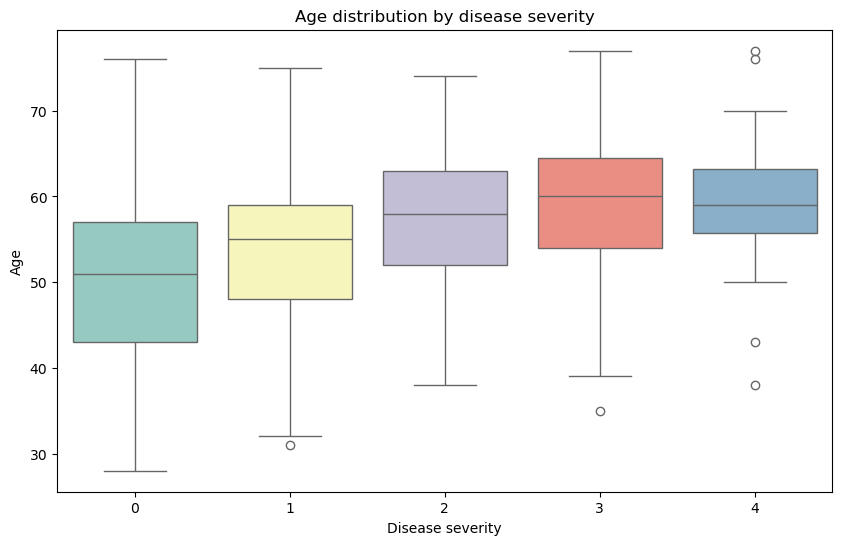

In [16]:
# تحليل العلاقة بين العمر والمرض
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["num"], y=df["age"], palette="Set3")
plt.title("Age distribution by disease severity")
plt.xlabel("Disease severity")
plt.ylabel("Age")
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_16928\2750098312.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["num"], y=df["chol"], palette="muted")


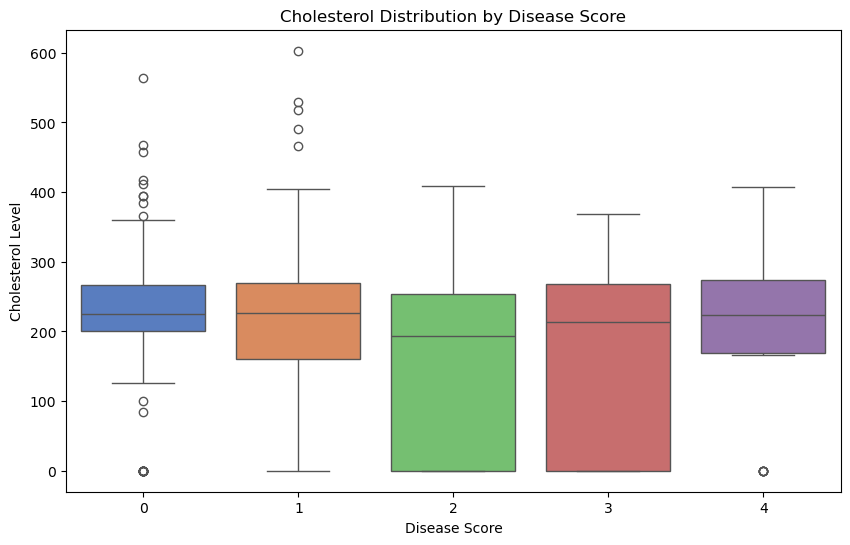

In [17]:
# تحليل العلاقة بين نسبة الكوليسترول والمرض
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["num"], y=df["chol"], palette="muted")
plt.title("Cholesterol Distribution by Disease Score")
plt.xlabel("Disease Score")
plt.ylabel("Cholesterol Level")
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# تعريف المتغيرات المستقلة (X) والمتغير التابع (y)
X = df.drop(columns=['id', 'num'])  # إزالة الأعمدة غير اللازمة
y = df['num']

# تحويل القيم الفئوية إلى قيم عددية
X = pd.get_dummies(X, drop_first=True)

# تدريب نموذج Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# استخراج الأهمية للسمات
feature_importances = rf.feature_importances_

# إنشاء DataFrame لعرض الأهمية
features = X.columns
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# ترتيب السمات حسب الأهمية
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# عرض السمات الأكثر أهمية
print(importance_df)

     Feature  Importance
0        age    0.126656
8     thalch    0.126037
5       chol    0.122240
10   oldpeak    0.110263
4   trestbps    0.102293
3         cp    0.086438
2    dataset    0.076520
9      exang    0.054107
13      thal    0.040778
7    restecg    0.039614
12        ca    0.035055
11     slope    0.031872
1        sex    0.025399
6        fbs    0.022727


In [19]:
# حساب الارتباط مع المتغير المستهدف
correlation = df.corr()['num'].sort_values(ascending=False)

# عرض السمات الأكثر ارتباطًا
print(correlation)

num         1.000000
oldpeak     0.411588
exang       0.350567
age         0.339596
dataset     0.276203
id          0.273552
ca          0.261797
sex         0.259342
thal        0.186387
fbs         0.129539
trestbps    0.113178
restecg     0.034603
slope      -0.201875
chol       -0.230539
cp         -0.314518
thalch     -0.349173
Name: num, dtype: float64


In [20]:
from sklearn.feature_selection import SelectKBest, f_classif

# تحديد السمات المستقلة
X = df.drop(columns=['id', 'num'])  # إزالة الأعمدة غير اللازمة
y = df['num']

# تحويل القيم الفئوية إلى قيم عددية
X = pd.get_dummies(X, drop_first=True)

# استخدام SelectKBest لاختيار أفضل 5 سمات
selector = SelectKBest(f_classif, k=5)
X_new = selector.fit_transform(X, y)

# عرض السمات المختارة
selected_features = pd.DataFrame(selector.get_support(), index=X.columns, columns=['Selected'])
print(selected_features[selected_features['Selected'] == True])

         Selected
age          True
cp           True
thalch       True
exang        True
oldpeak      True


In [21]:
# استيراد المكتبات اللازمة
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# تحديد السمات المختارة
selected_features = ['age', 'thalch', 'oldpeak', 'exang', 'cp']

# تحضير البيانات
X = df[selected_features]
y = df['num']

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تطبيق SMOTE على البيانات التدريبية لموازنة البيانات
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# بناء نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)

# التنبؤ باستخدام النموذج المدرب
y_pred = rf_model.predict(X_test)

# حساب الدقة وتقييم النموذج
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# عرض تقرير التصنيف
print(classification_report(y_test, y_pred))

Accuracy: 0.532608695652174
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        75
           1       0.50      0.52      0.51        54
           2       0.29      0.24      0.26        25
           3       0.40      0.31      0.35        26
           4       0.06      0.25      0.10         4

    accuracy                           0.53       184
   macro avg       0.40      0.41      0.39       184
weighted avg       0.56      0.53      0.54       184



In [22]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

# فصل الميزات والهدف
X = df.drop(columns=['id', 'num'])  # إزالة الأعمدة غير اللازمة
y = df['num']

# التعامل مع القيم المفقودة
imputer = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# تحويل الأعمدة الفئوية إلى قيم عددية باستخدام OneHotEncoder
categorical_cols = X.select_dtypes(include=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', X.select_dtypes(exclude=['object']).columns)
    ])

# تطبيق SMOTE بعد معالجة البيانات
X_transformed = preprocessor.fit_transform(X)

# تطبيق SMOTE لموازنة البيانات
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_transformed, y)

# تحقق من توزيع الفئات بعد تطبيق SMOTE
print(f"Class distribution after SMOTE: {Counter(y_smote)}")

Class distribution after SMOTE: Counter({0: 411, 2: 411, 1: 411, 3: 411, 4: 411})


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# تقسيم البيانات إلى مجموعة تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

# بناء نموذج Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=42)

# تدريب النموذج
rf_model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred = rf_model.predict(X_test)

# حساب الدقة
accuracy = accuracy_score(y_test, y_pred)

# عرض تقرير التصنيف
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8119935170178282
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       125
           1       0.76      0.57      0.65       129
           2       0.81      0.79      0.80       117
           3       0.80      0.87      0.83       127
           4       0.92      0.97      0.95       119

    accuracy                           0.81       617
   macro avg       0.81      0.81      0.81       617
weighted avg       0.81      0.81      0.81       617



In [24]:
!pip install xgboost

In [25]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

# تقسيم البيانات المتوازنة إلى مجموعة تدريب واختبار
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# إنشاء وتدريب نموذج XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_smote, y_train_smote)

# التنبؤ باستخدام النموذج المدرب
y_pred_xgb = xgb_model.predict(X_test_smote)

# حساب الدقة والتقارير
accuracy_xgb = accuracy_score(y_test_smote, y_pred_xgb)
print(f"Accuracy of XGBoost: {accuracy_xgb}")

# عرض تقرير التصنيف
print(classification_report(y_test_smote, y_pred_xgb))

Accuracy of XGBoost: 0.8175182481751825
              precision    recall  f1-score   support

           0       0.75      0.85      0.80        85
           1       0.73      0.57      0.64        81
           2       0.73      0.89      0.80        72
           3       0.92      0.85      0.88        84
           4       0.95      0.93      0.94        89

    accuracy                           0.82       411
   macro avg       0.82      0.82      0.81       411
weighted avg       0.82      0.82      0.82       411



In [26]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# تدريب نموذج XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, scale_pos_weight=4)  # scale_pos_weight للتعامل مع عدم التوازن
xgb_model.fit(X_smote, y_smote)

# التنبؤ باستخدام النموذج المدرب
y_pred_xgb = xgb_model.predict(X_test_smote)

# حساب الدقة والتقارير
accuracy_xgb = accuracy_score(y_test_smote, y_pred_xgb)
print(f"Accuracy of XGBoost: {accuracy_xgb}")

# عرض تقرير التصنيف
print("Classification Report for XGBoost:\n", classification_report(y_test_smote, y_pred_xgb))

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy of XGBoost: 1.0
Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        81
           2       1.00      1.00      1.00        72
           3       1.00      1.00      1.00        84
           4       1.00      1.00      1.00        89

    accuracy                           1.00       411
   macro avg       1.00      1.00      1.00       411
weighted avg       1.00      1.00      1.00       411



In [27]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

param_dist = {
    'max_depth': randint(3, 10),
    'n_estimators': randint(50, 200),
    'learning_rate': uniform(0.01, 0.2)
}

random_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10,  # عدد المحاولات
    cv=3,
    n_jobs=2,
    verbose=1,
    random_state=42
)

random_search.fit(X_smote, y_smote)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   n_jobs=2,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000026B6A4B41C0>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026B6DB07A90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000026B69878E80>},
                   random_state=42, verbose=1)

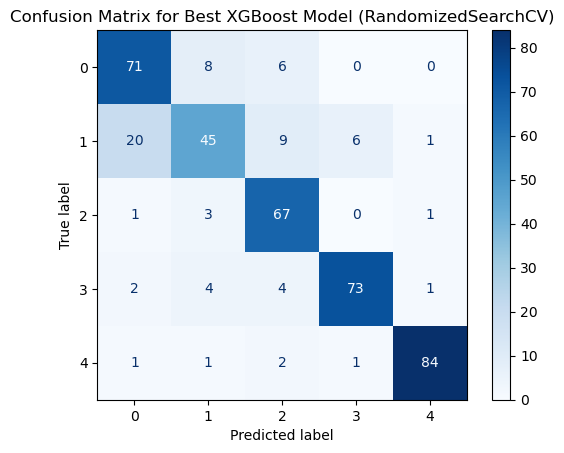

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب واختبار
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# الحصول على أفضل نموذج من RandomizedSearchCV
best_xgb_model = random_search.best_estimator_

# تدريب النموذج باستخدام مجموعة التدريب
best_xgb_model.fit(X_train, y_train)

# التنبؤ باستخدام مجموعة الاختبار
y_pred_xgb = best_xgb_model.predict(X_test)

# حساب مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred_xgb)

# عرض مصفوفة الالتباس
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Best XGBoost Model (RandomizedSearchCV)")
plt.show()

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79        85
           1       0.74      0.56      0.63        81
           2       0.76      0.93      0.84        72
           3       0.91      0.87      0.89        84
           4       0.97      0.94      0.95        89

    accuracy                           0.83       411
   macro avg       0.82      0.83      0.82       411
weighted avg       0.83      0.83      0.82       411



In [33]:
# حفظ النموذج
best_xgb_model.save_model("best_xgb_model.json")

In [34]:
# الحفظ بعد التدريب
best_xgb_model.save_model("models/best_xgb_model.json")